# 2 - Exploring LibROSA and its Visualizations
## Librosa
I learned about LibROSA while watching a scipy video:

[![](http://img.youtube.com/vi/MhOdbtPhbLU/0.jpg)](http://www.youtube.com/watch?v=MhOdbtPhbLU)

Seems pretty cool, the guy seems like a huge music nerd (in the senses of a nerd about music and just a frickin nerd in general), he seems to get who I am and what I want to do, so why not give it a try.

I'll just try to mimic his code here and get a feel for the librosa tool.

Let's get and load librosa first. Librosa recommends that we install C++ compiler for python and ffmpeg, so I've done that prior to installing librosa.
- [C++](https://www.microsoft.com/en-us/download/details.aspx?id=44266)
- [ffmpeg](http://ffmpeg.zeranoe.com/builds/)
    - Extract to any directory then add bin\ to PATH

In [3]:
# Enable plots in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# Seaborn makes our plots prettier
import seaborn
seaborn.set(style = 'ticks')

# Import the audio playback widget
from IPython.display import Audio

import numpy as np
import pandas as pd
import librosa
import librosa.display

Librosa comes out of the box with an example audio file (OGG format, I'm on a Windows machine here, so I had to restart my computer after adding ffmpeg to PATH... caused me a bit of confusion in my troubleshooting!). Let's load that file.

In [4]:
# Load example file
example_filepath = librosa.util.example_audio_file()
y, sr = librosa.load(example_filepath)

In [5]:
# Play audio using jupyter audio widget
Audio(data = y, rate = sr)

Man... that's just super cool in general. We've loaded a song and we're frickin playing it in jupyter. What a time to be alive.

![](https://upload.wikimedia.org/wikipedia/en/6/69/WATTBA.jpeg)

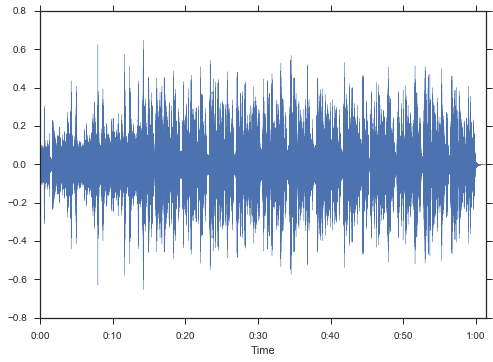

In [6]:
# Display waveform of song
librosa.display.waveplot(y, sr)

Here librosa comes with a built in time-series plot function that shows amplitude over time, but we can also show a spectrogram, converting this plot into the frequency domain.

## Frequency Domain & The Fourier Transform
Now, I remember being in digital signal processing in University. I didn't say I was good at it, and I didn't say I remember even remotely all of what I learned, but I remember being in the class lol. Even before that, in continuous & discrete signals and systems, we touched on the frequency domain. What is the frequency domain?

I will start off with this video:

[![](http://img.youtube.com/vi/r18Gi8lSkfM/0.jpg)](http://www.youtube.com/watch?v=r18Gi8lSkfM)

FIrst of all, my goodness, that music makes the Fourier transform so frickin epic. But yeah, the Fourier transform... I definitely had that smashed into my head in University. I'll be honest, even with how much jammed that down our throats, I never had a really good appreciation for what it was and how it's used. I really didn't care at the time because, well, University was University to me and I wasn't too excited about that. I'll say partially that many of my professors in this space never really conveyed the information in ways that I was able to easily appreciate, and I think that's a two-way street: I perhaps lacked the interest and knowledge to really appreciate their methods as well. All in all, the fact that the Fourier transform sounds familiar to me and that the baes concept is stuck in my head is a success! The video above, though, oh my god what a masterpiece. It so well visualizes how a signal is made up of various frequencies, and how every single signal can be decomposed to groups of sine waves. This gif from wikipedia is a great example as well:

![](https://upload.wikimedia.org/wikipedia/commons/7/72/Fourier_transform_time_and_frequency_domains_%28small%29.gif)

I don't even want to put any formulas in this section of the post because the basic idea that any signal can be decomposed into sine waves (also I'm dumb) is the most important thing. After we understand that fundamental cocnept, the idea of the frequency domain explains itself.

If every signal can be made of sine waves (some of which have infinite sine waves), we can take all those waves and break down which frequencies exist in that sound. A spectrogram does just that, taking the waveform above and swapping the y axis from amplitude to frequencies.

The result would look something like this:

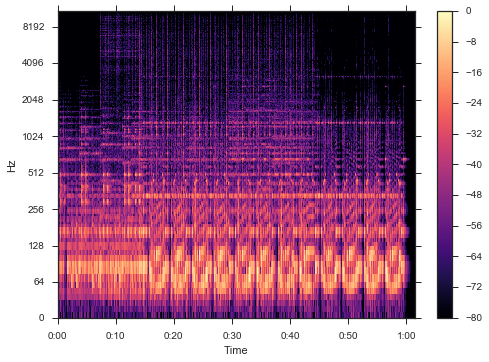

In [8]:
# Calculate short-time Fourier transform
example_stft = librosa.stft(y)

# Calculate log amplitude
example_stft_log_power = librosa.logamplitude(example_stft**2, ref_power = np.max)

# Plot spectrogram
librosa.display.specshow(example_stft_log_power, x_axis = 'time', y_axis = 'log')
plt.colorbar()

This video does a great job of tying together the frequency domains with the spectrogram as well (the first few minutes before he dives into the praat stuff).

[![](http://img.youtube.com/vi/Gg4IHbiITd0/0.jpg)](http://www.youtube.com/watch?v=Gg4IHbiITd0)

A spectrogram still shows a time-series view, but rather than showing the amplitude of the wave overall, it adds another dimension and shows the amplitude _**of each frequency found**_ within the Fourier transform into the frequency domain. This is basically saying that _**sine waves of these frequencies can be found at each timestamp in the song**_. Awesome.

In terms of music and sounds, it is easier to identify or fingerprint a specific sound in the frequency domain, as this is really how our hearing fundamentally work. These sine waves are causing our eardrums to vibrate at a specific frequency, which moves the liquid inside of our cochlea at the same frequency and that wave is converted to an electrical signal sent to our brain for sound processing as we hear it.

![](https://s-media-cache-ak0.pinimg.com/originals/c0/08/4e/c0084ec2e0a2dc095f8e0cc9fc6d1160.jpg)

In terms of the spectrogram we created from the librosa sample audio file, it means... kinda nothing to me right now. I mean, really what it is is that I'm just not familiar with what different frequencies and mixtures of frequencies sound like exactly, but I'm going down this road to learn, right?

## Constant-Q Transform
There apparently is something called the Constant-Q transform as well, but instead of the y-axis being represented in straight frequencies, it actually outputs a scale representing musical notes. Let's check it out.

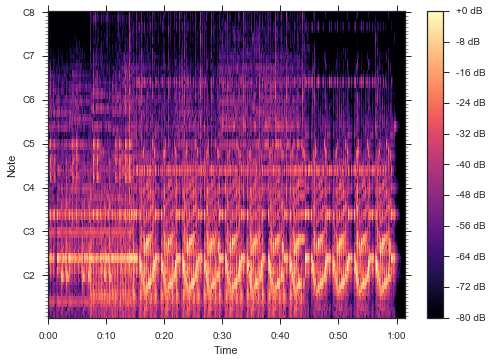

In [11]:
# Calculate short-time Fourier transform
example_cqt = librosa.cqt(y)

# Plot spectrogram
librosa.display.specshow(librosa.amplitude_to_db(example_cqt, ref = np.max), x_axis = 'time', y_axis = 'cqt_note')
plt.colorbar(format='%+2.0f dB')

Okay so the y-axis here has a scale of musical notes. Between every C note, there are 12 ticks. The 12 ticks, I assume, resemble all the musical notes (why is there 12 notes btw... our mind can only comprehend 12 notes? I'll worry about this later). If I reference the first 10 seconds or so of the song and the scale below:

<img src="https://assets.key-notes.com/piano_key_chart.png" style="width: 400px;"/>

The first 10 seconds has, I want to say 4 main horizontal lines there. From the largest amplitude (brightest) to the smallest (darkest):
1. F\#2
2. F3
3. C3
4. E1

There's kind of one at C5, but it seems to fade in and out. Also, these bands of notes seem to span the width of more than a note as well, and although some are centered at one note, some I had trouble deciphering. Not sure if this is the actual waveform or something off about librosa's scale, but these are just estimates for now.

What do I make of this... I just listened to the first 10 seconds of the song at least 12 times, and I'm picking up a bit on the notes at F\#2 and the sets of two notes at C2 around the 3, 7, and 10 seconds mark. This is definitely the bassline, we can match that up almost perfectly. Are they F\#2 and C2 to be exact? I'm not sure, but C2 is definitely about where the bassline is.

We noticed something else at E1, right? What is that? I'm not quite sure... I wonder if that's just some type of white noise or background noise or something... I can't decipher a solid beat lower than the bassline.

Okay, let's break this down a bit more by instrument:
1. 0:00 - 0:07: Bass, some kind of synth (?, the one that goes boop, boop), and what I think are strings or could be another synth
2. 0:07 - 0:15: Add in what seem like high hats and rides
3. 0:15 - 0:30: Add in snares, xylophone, bass changes rhythms
4. 0:30 - 0:45: Add in what sounds like some potentially modulated voices
5. 0:45 - 1:00: Cut out everything and only keep bass and xylophone

Well, let's start with the end because there aer only 2 instruments there and it seems quite simple to decipher:

#### 0:45 - 1:00
Here, there only exists a bass and a xylophone. The bass we've already seen to be in that C2 - C3 range, but if we contrast it with the F3 note, it also takes on a very similar pattern. I really want to say that both the F\#2 and F3 notes are the bass! Somehow, the bass it taking on multiple notes in our CQT plot. There seems to be another line around F4 as well, but I don't think it's the bass because it's not present in the first 10 seconds, where the bass is also being played. Perhaps F4 and up is the xylophone?

#### 0:07 - 0:15
I'll jump to the beginning because I think I can decipher the high hats and rides here. The only thing that really differs between this section and the first 7 seconds is that we see more of a fingerprint in the C7 - C8 range and the C1 - C2 range... Are the high hats making their mark high and low? I'm not sure, but it seems that way.

#### 0:15 - 0:30
Here, the xylophone comes in, very similar to the 0:45 - 1:00 section.

#### 0:30 - 0:45
Here, the only difference from the last section is the modulated voice that comes in. This seems to play in that C5 - C8 level.

So what I'm seeing is C3 - C4 kinda marks the break between bass and treble type sounds.

[This online app](http://www.apronus.com/music/flashpiano.htm) actually allows us to hear what C1 - C8 sounds like. C3 and C4 certainly sound like the break!

Okay, so my impression is still a bit cloudy, but at least I have a better sense of how this scale is broken out.

## Chromagram
In the Constant-Q Transform, I saw a few F's / F\#'s come into play (F1, F2, F3) and decided that this was likely the fingerprint of the bassline. I mentioned that from 0:15 - 0:45, the bassline seems to be present in the F2 and F3 ranges and wondered if both were from the same instrument. And now, I am just discovering the concept of [timbre](https://en.wikipedia.org/wiki/Timbre), which is the

> perceived sound quality of a musical note, sound, or tone that distinguishes different types of sound production, such as choir voices and musical instruments, such as string instruments, wind instruments, and percussion instruments, and which enables listeners to hear even different instruments from the same category as different (e.g. a viola and a violin)

One attribute of timbre, as outlined on the wikipedia page as well, is that different sounds have different _**harmonics**_. A C played on a violin will be different from a C played on a piano which will be different from a C sung by an opera singer. Harmonics differentiate these sounds despite the fundamental frequency being played is still a C. A viola may have lower fundamental frequencies in the C2 - C4 range (I am _**TOTALLY**_ making this up right now btw) whereas an opera singer may span higher frequency ranges. A chromagram, thus, compacts these into a single fundamental frequency scale and... well... let's just take a look at it why don't we:

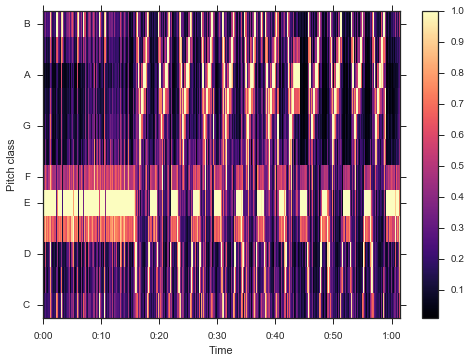

In [20]:
# Calculate the condensed chroma CQT
example_chroma_cqt = librosa.feature.chroma_cqt(y=y, sr=sr)

# Plot chromagram
librosa.display.specshow(example_chroma_cqt, y_axis = 'chroma', x_axis = 'time')
plt.colorbar()

Referencing the librosa documentation, it seems that the chromagram can be kinda quantized (I think there's a better word for me to use here, but I'm blanking at the moment) to the beat as well. Note here that I'm not talking about quantize as in auto-tuning to a beat, but quantizing to the main beat (e.g. 4/4) that librosa finds.

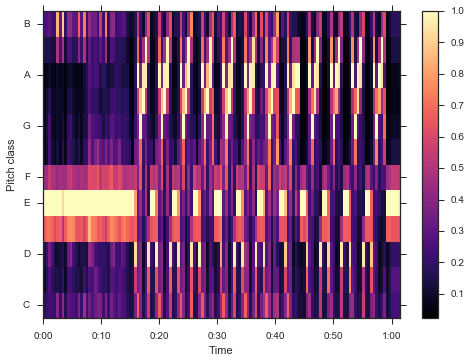

In [21]:
# Extract tempo and beat
tempo, beat_f = librosa.beat.beat_track(y = y, sr = sr, trim = False)
beat_f = librosa.util.fix_frames(beat_f, x_max = example_chroma_cqt.shape[1])

# Sync CQT w/ beat
example_cqt_sync = librosa.util.sync(example_chroma_cqt, beat_f, aggregate = np.median)
beat_t = librosa.frames_to_time(beat_f, sr = sr)

# Plot chromagram
librosa.display.specshow(example_cqt_sync, y_axis = 'chroma', x_axis = 'time', x_coords=beat_t)
plt.colorbar()

A bit cleaner of a look here. Is it perfect? I'm sure not. Unless you're dealing with house or techno or any other synthetic beat that runs along a computer's clock, you will not have absolutely perfect time (or unless you got one of the best bass players in the world keeping time for you).

Judging by the chromagram, it looks like I was pretty much completely off the mark when I guessed the F. I think it was actually an E instead. There's a small hint of F there, but it's clearly an E.

I'm taking a shot in the dark here, but I assume that this is how my [KeyFinder](http://www.ibrahimshaath.co.uk/keyfinder/) program calculates the key of a song! I'm saying this with zero MIR knowledge and zero knowledge of how that keyfinder program works, but having taken a bit of piano in my past, if you know which notes are being played, you can probably infer the key. I'm not quite sure exactly what the third dimension of a chromagram is... the [chromagram](https://en.wikipedia.org/wiki/Chroma_feature) wikipedia page indicates "intensity" from 0 to 1, which must be some scaled version of the energy distribution across all octaves of the fundamental frequency:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/25/ChromaFeatureCmajorScaleScoreAudioColor.png/600px-ChromaFeatureCmajorScaleScoreAudioColor.png" style="width: 400px;"/>

But if we just, in the librosa example, find all notes that have an intensity of more than like 0.9, we're only left with like D, E, G, G#, A, A#. I kinda forget what key that is, but I'm sure I could figure it out with a bit of googling.

Maybe to back up a bit, in the digital djing world, there exists programs where you can find the key of a specific song. The beauty of digital signal processing and the demise of your traditional disc jockey skill set and passion. It reasons to believe that a song in one key will mix well with another song of the same key, or a key that is ["relative, or in a dominant or subdominant relationship"](https://en.wikipedia.org/wiki/Harmonic_mixing) with the original key... all this to say, there are keys that "fit well" together and "sound good".

Back in the days with vinyl, you'd have to have a bit more of a sense of musicality to actually mix songs, or you just mix house and techno where there are long intros and outros and no melody during those sequences. Nowadays, I run KeyFinder, add that to the metadata of the song, and I already know beforehand which songs will sound good mixed together. If that sounds like cheating, it is. But, is it anymore cheating than... I dunno... using a phone to communicate haha. The fact that I'm both an engineer and music enthusiast makes this a bit of a tougher debate.

## Tempogram
The last one that I want to exlpore is the tempogram. Easy enough, it tells us the increments of tempo that the song seems to fit.

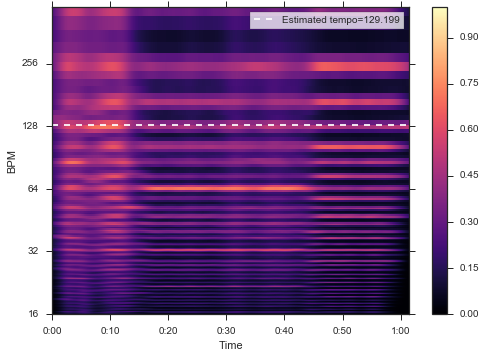

In [24]:
# Generate tempogram
example_tgram = librosa.feature.tempogram(y = y, sr = sr)

# Show tempogram
librosa.display.specshow(example_tgram, x_axis = 'time', y_axis = 'tempo')
plt.colorbar()

# Append tempo estimate
plt.axhline(tempo, color = 'w', linestyle = '--', alpha = 1, label = 'Estimated tempo={:g}'.format(tempo))
plt.legend(frameon=True, framealpha=0.75)

And there you go... there's the _**other**_ dj software I use haha. One to estimate the BPM so you can get an even better sense of which songs will mix well with other songs.

I'm a bit confused by this tempogram though. We obviously see that it has multiple lines, and I get that, because something that's 120 BPM will also be 240 BPM which will also be 60 BPM. Similarly for this song, I see something at 128 BPM, 256 BPM, and 64 BPM, but then many traces of BPM's in between as well. In fact, there's like 3 lines between 64 - 128...?! I'm not quite understanding that.

Listening to the song again, it's easy to get tripped up if you're just listening to the high hats or xylophones... I can see pieces where [onset detection](https://www.youtube.com/watch?v=FmwpkdcAXl0) might think that the tempo is a bit more varied.

Looking at the itensity in the third dimension, however, we see very clearly that your 32 / 64 / 128 BPMs are prevalent thorughout most of the song, and perhaps this is what made librosa's beat_track() function detect 129.199. Great stuff.

## Conclusion
Basically, I'm blown away that people are charging for software that does this shit and librosa's community is nice enough to break it down to such a level that an idiot like me can understand...

Where do I go from here? I might try to tamper with a few sounds or songs... Maybe check out the waveform of some graphs... explore a bit more of what librosa has to offer so I can actually generate my features for my downstream clustering or supervised learning analysis.

Again, my one objective here is to simply _**learn something new that I didn't know before in either tools, math, ML, or music**_. Easy enough!